# Лабораторная работа 2
Визуализация данных

Выполнил: 6133, Борисов Дмитрий Сергеевич (добавить в имя файла)

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
data = pd.read_csv("data/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Данные о лекарствах и о людях, которые их покупают

[Dataset](https://www.kaggle.com/prathamtripathi/drug-classification)

* Age (int64) - возраст человека, принимающего данное лекарство (Целочисленный показатель)
* Sex (Str) - бинарный указатель гендера человека (Бинарный показатель)
* BP (Str) - Уровень кровяного давления
* Cholesterol (Str) - Показатель холестерина у человека (Категориальный показатель)
* Na_to_k (float64) - отношение натрия к калию (Вещественный показатель)
* Drug (Str) - название лекарства (Категориальный показатель)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
print("Уникальные значения колонки Sex: ", data.Sex.unique())
print("Уникальные значения колонки BP: ", data.BP.unique())
print("Уникальные значения колонки Cholesterol: ", data.Cholesterol.unique())
print("Уникальные значения колонки Drug: ", data.Drug.unique())

Уникальные значения колонки Sex:  ['F' 'M']
Уникальные значения колонки BP:  ['HIGH' 'LOW' 'NORMAL']
Уникальные значения колонки Cholesterol:  ['HIGH' 'NORMAL']
Уникальные значения колонки Drug:  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.


Text(0, 0.5, 'Количество, шт.')

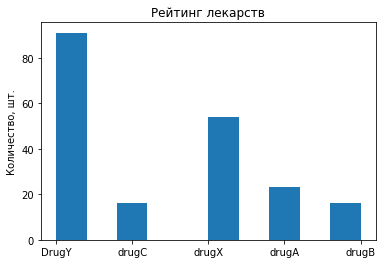

In [6]:
# 1.1 
plt.hist(data.Drug)
plt.title("Рейтинг лекарств")
plt.ylabel("Количество, шт.")

Text(0, 0.5, 'Количество людей, шт.')

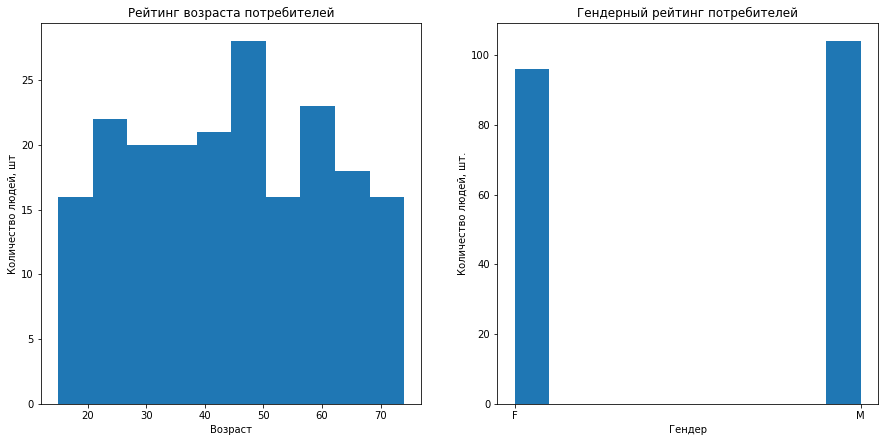

In [7]:
# 1.2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.hist(data.Age)
ax1.set_title('Рейтинг возраста потребителей')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество людей, шт')

ax2.hist(data.Sex)
ax2.set_title('Гендерный рейтинг потребителей')
ax2.set_xlabel('Гендер')
ax2.set_ylabel('Количество людей, шт.')

2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:ylabel='Frequency'>

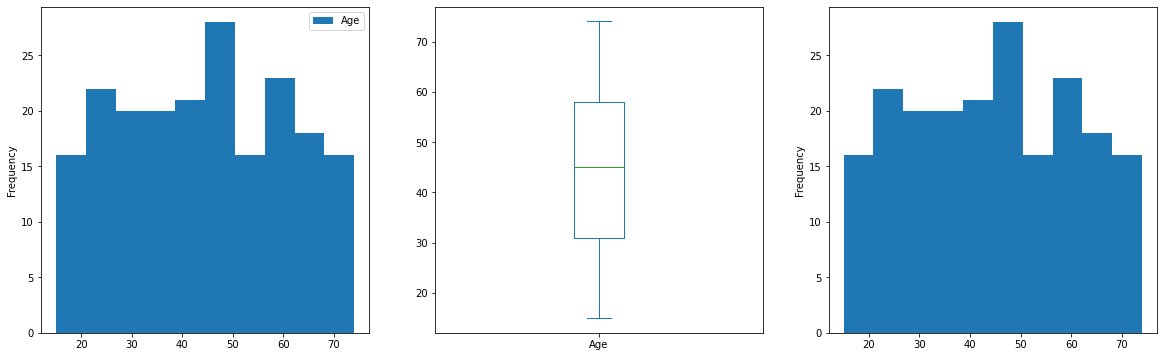

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
data.plot(y='Age', kind='hist', ax=ax1)
data.plot(y='Age', kind='box', ax=ax2)
data['Age'].plot(y='Age', kind='hist')

3  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)


Зависимостей между возрастом и отношением натрия к калию не замечено

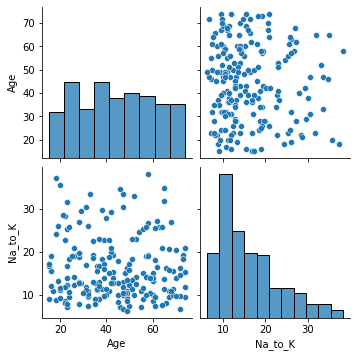

In [9]:
# 3.1
sns.pairplot(data)

Зависимостей между возрастом и отношением натрия к калию не замечено

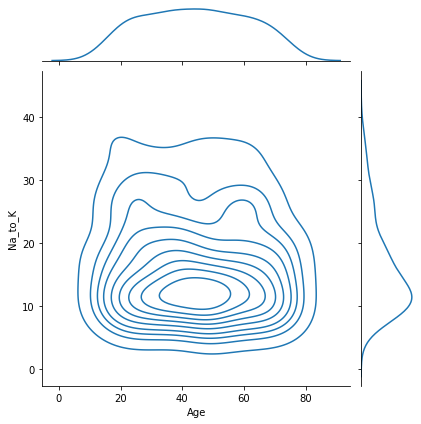

In [10]:
# 3.2
sns.jointplot(data=data, x="Age", y="Na_to_K", kind='kde')

Популярность лекарст у различных возрастов: лекарство В используется в основном в старшем возрасте

<AxesSubplot:xlabel='Drug', ylabel='Age'>

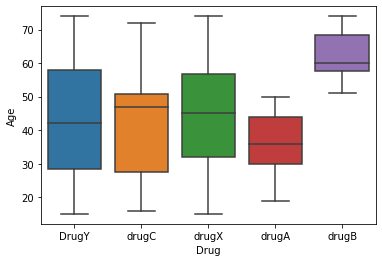

In [11]:
# 3.3
sns.boxplot(data=data, x='Drug', y='Age')

Среднее значение возраста для каждого лекарства: как и в предыдущем пункте видно, что лекарство А востребовано для молодых, а лекарство В - для старших

<AxesSubplot:ylabel='Drug'>

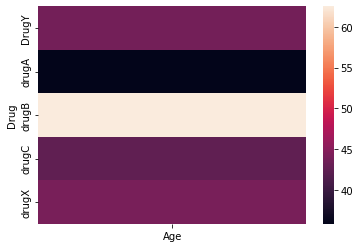

In [12]:
sns.heatmap(data=data[['Drug', 'Age']].groupby('Drug').mean())

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [13]:
from scipy.stats import probplot

Распределение выборки возрастов близко к нормальному распределению

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

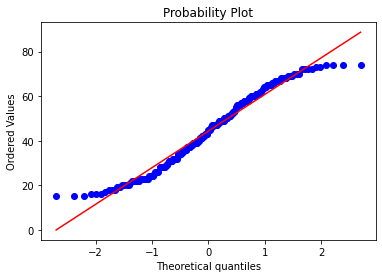

In [14]:
probplot(data['Age'], dist="norm", plot=plt)

5 Построить любой график (связанный с вашими данными) с помощью plotly

In [15]:
import plotly.express as px

In [16]:
 px.histogram(data, x='Drug')